## 01. Import Libraries

In [27]:
# import libraries:

import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt 

## 02. Import Data

In [30]:
# importing final dataframe:

df = pd.read_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/FINAL DATA SETS/FINAL_df.csv', index_col = 0)


In [32]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes,daily_ride_count,month,season
0,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,8 Ave & W 16 St,40.730207,-73.991026,40.740983,-74.001702,casual,2022-01-01,11.6,10.368000,5105,1,winter
1,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,Park Ave & E 124 St,40.805159,-73.954692,40.804555,-73.939686,casual,2022-01-01,11.6,8.487583,5105,1,winter
2,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,W 100 St & Broadway,40.754920,-73.984550,40.797372,-73.970412,member,2022-01-01,11.6,22.788850,5105,1,winter
3,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,Hudson St & W 13 St,40.732219,-73.981656,40.740057,-74.005274,member,2022-01-01,11.6,10.781733,5105,1,winter
4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,West End Ave & W 94 St,40.770513,-73.988038,40.794165,-73.974124,member,2022-01-01,11.6,9.753150,5105,1,winter


In [34]:
df.shape

(7441508, 16)

## 03. Sample Data and Visualizations

In [ ]:
# going to drop unnecesary columns, then save.

df1 = df.drop(['ride_id', 'start_station_id', 'end_station_id'], axis = 1)
df1.head()

In [29]:
df1.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/FINAL_df.csv')

In [44]:
# going to take a sample of this df, so we can conduct the analysis on JUST a portion of the data 
# more specifically a small enough portion to load into gitHub :)
# to do this AND make sure the results are reproducible, we are going to use a random state

df_sample = df1.sample(frac=0.1, random_state=32)
df_sample.shape

(744151, 16)

In [33]:
# perfect, this is manageable/workable, and we will save this as well!
df_sample.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/FINAL_df_SAMPLED.csv')

In [26]:
df_sample.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes,daily_ride_count,month,season
3209584,classic_bike,2022-07-04 21:24:24.561,2022-07-04 22:00:53.153,Pacific St & Nevins St,Pacific St & Nevins St,40.685376,-73.983021,40.685376,-73.983021,casual,2022-07-04,25.6,36.476533,23668,7,summer
5428674,electric_bike,2022-09-20 14:34:58.115,2022-09-20 14:50:11.805,Broadway & E 21 St,Kenmare St & Elizabeth St,40.739888,-73.989586,40.720540,-73.994900,casual,2022-09-20,23.2,15.228167,32389,9,fall
1913004,classic_bike,2022-05-17 07:35:57.190,2022-05-17 07:58:42.737,27 St & Hunter St,W 42 St & 6 Ave,40.748500,-73.941275,40.754920,-73.984550,member,2022-05-17,19.7,22.759117,29377,5,spring
3506299,classic_bike,2022-07-15 17:31:48.768,2022-07-15 17:34:07.620,E 2 St & Avenue C,E 4 St & Ave B,40.720874,-73.980858,40.723347,-73.982659,member,2022-07-15,26.1,2.314200,29801,7,summer
5663311,classic_bike,2022-09-29 11:39:02.933,2022-09-29 11:58:48.247,Stanton St & Chrystie St,W 16 St & The High Line,40.722293,-73.991475,40.743349,-74.006818,casual,2022-09-29,16.6,19.755233,30243,9,fall


In [30]:
# let's make an aggregated data set for the customers, count of each type:

df_sample['member_casual'].value_counts()

member_casual
member    580311
casual    163840
Name: count, dtype: int64

In [32]:
# first step is to create the new DF

member_types = df_sample['member_casual'].value_counts().reset_index()

# now set the new columns:

member_types.columns = ['member_type', 'count']
member_types

,member_type,count
0,member,580311
1,casual,163840


In [97]:
# total: 744151, 
# members make up 77.98% of riders

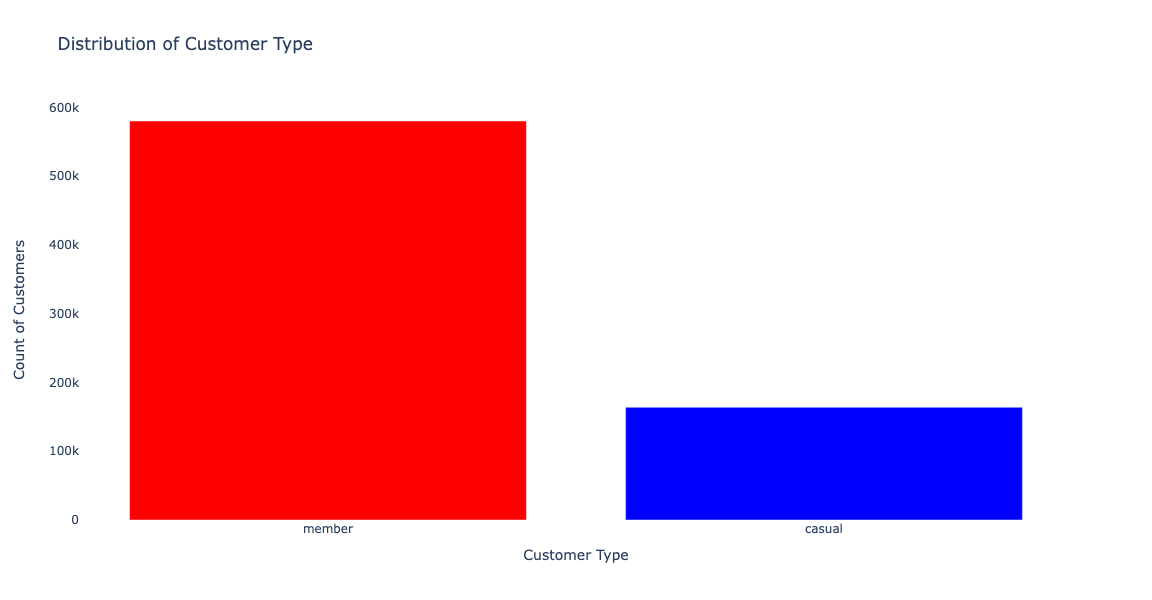

In [63]:
# now we can plot this (will use in our dashboard):

fig = go.Figure(go.Bar(
    x=member_types['member_type'],
    y=member_types['count'],
    marker = {'color':member_types['count'], 'colorscale' : 'bluered'}
                      ))

# Update the layout
fig.update_layout(
    title='Distribution of Customer Type',
    xaxis_title='Customer Type',
    yaxis_title='Count of Customers',
    plot_bgcolor='white',
    width=900,
    height=600
)

# Show the figure
fig.show()

In [58]:
# export this df to our folder for our dashboard:

member_types.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/member_types.csv')

In [41]:
# cool, let's do this again, but with rideable types:

df_sample['rideable_type'].value_counts()

rideable_type
classic_bike     451927
electric_bike    292224
Name: count, dtype: int64

In [43]:
# first step is to create the new DF

rideable_types = df_sample['rideable_type'].value_counts().reset_index()

# now set the new columns:

rideable_types.columns = ['rideable_type', 'count']
rideable_types

,rideable_type,count
0,classic_bike,451927
1,electric_bike,292224


classic bikes are 60.7% of the rideables

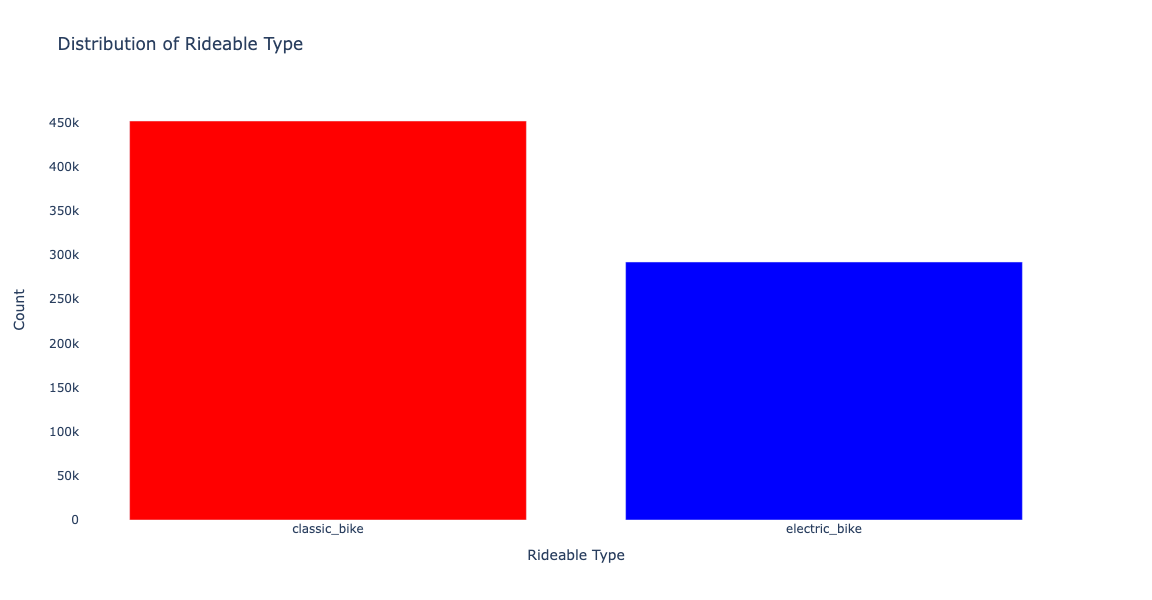

In [61]:
# now we can plot this (will use in our dashboard):

fig = go.Figure(go.Bar(
    x=rideable_types['rideable_type'],
    y=rideable_types['count'],
    marker = {'color':rideable_types['count'], 'colorscale' : 'bluered'}
                      ))

# Update the layout
fig.update_layout(
    title='Distribution of Rideable Type',
    xaxis_title='Rideable Type',
    yaxis_title='Count',
    plot_bgcolor='white',
    width=900,
    height=600
)

# Show the figure
fig.show()

In [56]:
# export this df to our folder for our dashboard:

rideable_types.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/rideable_types.csv')

In [70]:
# let's see how ride time varies:

df_sample.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes,daily_ride_count,month,season
3209584,classic_bike,2022-07-04 21:24:24.561,2022-07-04 22:00:53.153,Pacific St & Nevins St,Pacific St & Nevins St,40.685376,-73.983021,40.685376,-73.983021,casual,2022-07-04,25.6,36.476533,23668,7,summer
5428674,electric_bike,2022-09-20 14:34:58.115,2022-09-20 14:50:11.805,Broadway & E 21 St,Kenmare St & Elizabeth St,40.739888,-73.989586,40.720540,-73.994900,casual,2022-09-20,23.2,15.228167,32389,9,fall
1913004,classic_bike,2022-05-17 07:35:57.190,2022-05-17 07:58:42.737,27 St & Hunter St,W 42 St & 6 Ave,40.748500,-73.941275,40.754920,-73.984550,member,2022-05-17,19.7,22.759117,29377,5,spring
3506299,classic_bike,2022-07-15 17:31:48.768,2022-07-15 17:34:07.620,E 2 St & Avenue C,E 4 St & Ave B,40.720874,-73.980858,40.723347,-73.982659,member,2022-07-15,26.1,2.314200,29801,7,summer
5663311,classic_bike,2022-09-29 11:39:02.933,2022-09-29 11:58:48.247,Stanton St & Chrystie St,W 16 St & The High Line,40.722293,-73.991475,40.743349,-74.006818,casual,2022-09-29,16.6,19.755233,30243,9,fall


In [74]:
# we are interested in trip_length_minutes, will group by season

df_sample['trip_length_minutes'].describe()

count    744151.000000
mean         15.371012
std          32.735055
min           1.001233
25%           5.786767
50%          10.144133
75%          17.918525
max        1439.068367
Name: trip_length_minutes, dtype: float64

In [78]:
df_sample.groupby('season')['trip_length_minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,218092.0,15.051722,34.145224,1.002683,5.636879,9.867267,17.308679,1433.238467
spring,174073.0,15.760901,33.466031,1.001233,5.950900,10.416683,18.455067,1432.257950
summer,257287.0,16.424364,32.249181,1.001717,6.163517,10.928800,19.469225,1439.068367
winter,94699.0,12.527814,28.976439,1.001450,5.060642,8.532283,14.489742,1398.743600


In [86]:
# while there isn't much variability, we will see if plotting this makes it more apparent!
# let's save this aggregated data so it's smaller / easier for the dashboard!

trip_length_seasons = df_sample.groupby('season')['trip_length_minutes'].describe().reset_index()

trip_length_seasons

,season,count,mean,std,min,25%,50%,75%,max
0,fall,218092.0,15.051722,34.145224,1.002683,5.636879,9.867267,17.308679,1433.238467
1,spring,174073.0,15.760901,33.466031,1.001233,5.950900,10.416683,18.455067,1432.257950
2,summer,257287.0,16.424364,32.249181,1.001717,6.163517,10.928800,19.469225,1439.068367
3,winter,94699.0,12.527814,28.976439,1.001450,5.060642,8.532283,14.489742,1398.743600


In [88]:
trip_length_seasons.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/trip_length_seasons.csv')

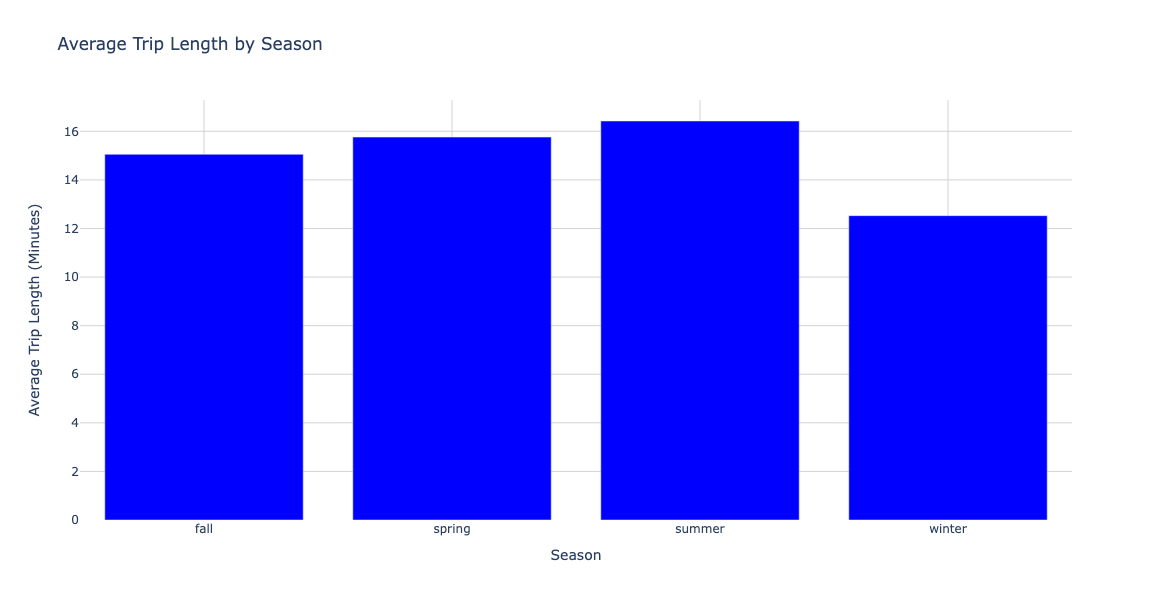

In [92]:
# Create a bar plot for average trip length by season
avg_trip_length_fig = go.Figure(go.Bar(
    x=trip_length_seasons['season'],
    y=trip_length_seasons['mean'],
    marker=dict(color='blue')
))

avg_trip_length_fig.update_layout(
    title='Average Trip Length by Season',
    xaxis_title='Season',
    yaxis_title='Average Trip Length (Minutes)',
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgrey'),
    yaxis=dict(gridcolor='lightgrey'),
    width=1100,
    height=600
)

In [8]:
# in order to load our map effectively, we are also going to take a sample of the data set:

ride_data = pd.read_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/FINAL DATA SETS/most_popular_ride_paths_w_coordinates_SORTED.csv', index_col = 0)

In [10]:
ride_data.head()

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,path_count
187273,Central Park S & 6 Ave,Central Park S & 6 Ave,40.765909,-73.976342,40.765909,-73.976342,2991
90486,7 Ave & Central Park South,7 Ave & Central Park South,40.766741,-73.979069,40.766741,-73.979069,2124
509665,Roosevelt Island Tramway,Roosevelt Island Tramway,40.757284,-73.953600,40.757284,-73.953600,2043
521635,Soissons Landing,Soissons Landing,40.692317,-74.014866,40.692317,-74.014866,1928
356984,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,40.764397,-73.973715,40.764397,-73.973715,1829


In [15]:
ride_data.shape

(664516, 7)

In [17]:
# cool, now to sample. Again going to utilize a random seed, then save and load into kepler.gl along with our attractions..

rides_sampled = ride_data.sample(frac=0.25, random_state=49)
rides_sampled.shape

(166129, 7)

In [19]:
rides_sampled.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/FINAL DATA SETS/sampled_ride_paths.csv')

In [46]:
# lets create an even smaller sample of the dataframe to ensure it is compatible with GitHub upload limitations

df_sample.shape

(744151, 16)

In [62]:
df_sample2 = df_sample.sample(frac=0.15, random_state=39)
df_sample2.shape

(111623, 16)

In [64]:
# exporting this: 

df_sample2.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/FINAL DATA SETS/Final_Sample.csv')